## Deep Neural Network with keras-Python: Satellite-Image Classification

This tutorial  will show how to implement [Deep Neural Network](https://en.wikipedia.org/wiki/Deep_learning) for [pixel based](https://gis.stackexchange.com/questions/237461/distinction-between-pixel-based-and-object-based-classification) [supervised classification ](https://articles.extension.org/pages/40214/whats-the-difference-between-a-supervised-and-unsupervised-image-classification) of [Sentinel-2 multispectral images](https://sentinel.esa.int/web/sentinel/missions/sentinel-2) using [keras](https://keras.io/#installation/) package in [Anaconda 5.1 Python 3.6](https://www.anaconda.com/download/#download/) under [Windows 10](https://www.microsoft.com/en-us/software-download/windows10).

[keras](https://keras.rstudio.com/) is a popular Python package for deep neural networks with multiple backends, including [TensorFlow](https://www.tensorflow.org/), [Microsoft Cognitive Toolkit (CNTK)](https://docs.microsoft.com/en-us/cognitive-toolkit/), and [Theano](http://deeplearning.net/software/theano/). The keras package is able to provide a flexible and feature-rich API and can run both [CPU and GUP version of TensorFlow](https://www.tensorflow.org/install/install_windows) in both Windows and Linux.  If you want to run this tutorial with [GUP version of TensorFlow](https://www.tensorflow.org/install/install_windows) you need following prerequisites in your system:   

*[NVIDIA GUP](https://developer.nvidia.com/cuda-gpus): First, you must make sure weather your computer is running with [NVIDIAÂ® GPU](https://developer.nvidia.com/cuda-gpus) or not. Follow the instruction as described  [here](http://nvidia.custhelp.com/app/answers/detail/a_id/2040/~/identifying-the-graphics-card-model-and-device-id-in-a-pc).  

*[CUDA Toolkit v9.0](https://developer.nvidia.com/cuda-90-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal): If you have an NVIDIAÂ® GPU in your system, you need to download and install [CUDA Toolkit  v9.0](https://developer.nvidia.com/cuda-90-download-archive?target_os=Windows&target_arch=x86_64&target_version=10&target_type=exelocal). Detail installation steps can be found [here](http://nvidia.custhelp.com/app/answers/detail/a_id/2040/~/identifying-the-graphics-card-model-and-device-id-in-a-pc).

*[cuDNN v7.0](https://developer.nvidia.com/cudnn): The download the zip file version [cuDNN v7.0](https://developer.nvidia.com/cudnn) for your CUDA Toolkit v9.0.You need to extract the zip file and add the location where you extracted it to your system PATH.  Detail installation steps can be found here [here](F:/DeepLearning_tutorial/Satellite_Image_Calssification/h20_R_ImageCalssification/keras_R/Detail installation steps are described here). 

Detail installation steps of Keras backend Tensorflow can be found [here](https://keras.io/#installation).

First, we will split "point_data" into a training set (75% of the data), a validation set (12%) and a test set (13%) data.The validation data set will be used to optimize the model parameters during training process.The model's performance will be tested with the data set and then we will predict landuse clasess on grid data set. The point and grid data can be download as [rar](https://www.dropbox.com/s/l94zhzwjrc3lkk7/Point_Grid_Data.rar?dl=0), [7z](https://www.dropbox.com/s/77qk7raj48z0151/Point_Grid_Data.7z?dl=0) and [zip](https://www.dropbox.com/s/007vd9vayn60c2s/Point_Grid_Data.zip?dl=0) format.

In [30]:
# Load Packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.regularizers import l2
from keras import optimizers
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics

In [31]:
# load dataset
os.chdir('F:/My_GitHub/DNN_Keras_Python/Data') 
filename = 'point_data.csv'
dataset = pd.read_csv(filename)
list(dataset)

['x',
 'y',
 'Class_ID',
 'B2',
 'B3',
 'B4',
 'B5',
 'B6',
 'B7',
 'B8',
 'B8A',
 'B11',
 'B12',
 'Class',
 'Description']

In [32]:
# Define response (Y) and predictors (X) 
Class_ID = dataset[['Class_ID']]
X = dataset[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
# Specify the target labels and flatten the array 
Y= np.ravel(Class_ID)

In [33]:
# Split the data up in train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [34]:
# Scale the train & test data set
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [35]:
# Initialize the constructor
# define vars
input_num_units = 10
hidden1_num_units = 200
hidden2_num_units = 200
hidden3_num_units = 200
hidden4_num_units = 200
output_num_units = 5

In [36]:
# Define model
model = Sequential([
    Dense(output_dim=hidden1_num_units, input_dim=input_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden2_num_units, input_dim=hidden1_num_units, kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.2),
    Dense(output_dim=hidden3_num_units, input_dim=hidden2_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=hidden4_num_units, input_dim=hidden3_num_units,  kernel_regularizer=l2(0.0001), activation='relu'),
    Dropout(0.1),
    Dense(output_dim=output_num_units, input_dim=hidden4_num_units, activation='softmax'),
 ])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=10, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(input_dim=200, kernel_regularizer=<keras.reg..., activation="relu", units=200)`
  if __name__ == '__main__':
C:\ProgramData\Anac

In [37]:
# Model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 200)               2200      
_________________________________________________________________
dropout_5 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_6 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 200)               40200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 200)               40200     
__________

In [38]:
## Define optimizer: Stochastic gradient descent 
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

In [39]:
# Compile model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])

In [40]:
# Fit model                
history=model.fit(X_train, 
          Y_train,
          epochs=100, 
          batch_size=100, 
          validation_split = 0.2,
          verbose=1,
          )

Train on 15324 samples, validate on 3832 samples
Epoch 1/100
15324/15324 [==============================] - 2s 106us/step - loss: 1.4522 - acc: 0.4366 - val_loss: 1.2274 - val_acc: 0.5566
Epoch 2/100
15324/15324 [==============================] - 1s 76us/step - loss: 1.0999 - acc: 0.6988 - val_loss: 0.8229 - val_acc: 0.8017
Epoch 3/100
15324/15324 [==============================] - 1s 81us/step - loss: 0.7285 - acc: 0.8034 - val_loss: 0.5436 - val_acc: 0.8165
Epoch 4/100
15324/15324 [==============================] - 1s 74us/step - loss: 0.5503 - acc: 0.8328 - val_loss: 0.4617 - val_acc: 0.8499
Epoch 5/100
15324/15324 [==============================] - 1s 76us/step - loss: 0.4915 - acc: 0.8476 - val_loss: 0.4322 - val_acc: 0.8528
Epoch 6/100
15324/15324 [==============================] - 1s 73us/step - loss: 0.4605 - acc: 0.8602 - val_loss: 0.4117 - val_acc: 0.8575
Epoch 7/100
15324/15324 [==============================] - 1s 79us/step - loss: 0.4382 - acc: 0.8669 - val_loss: 0.3921 - 

15324/15324 [==============================] - 1s 77us/step - loss: 0.2736 - acc: 0.9235 - val_loss: 0.2566 - val_acc: 0.9254
Epoch 60/100
15324/15324 [==============================] - 2s 116us/step - loss: 0.2718 - acc: 0.9249 - val_loss: 0.2579 - val_acc: 0.9269
Epoch 61/100
15324/15324 [==============================] - 2s 105us/step - loss: 0.2727 - acc: 0.9243 - val_loss: 0.2541 - val_acc: 0.9269
Epoch 62/100
15324/15324 [==============================] - 1s 83us/step - loss: 0.2731 - acc: 0.9236 - val_loss: 0.2530 - val_acc: 0.9277
Epoch 63/100
15324/15324 [==============================] - 1s 83us/step - loss: 0.2699 - acc: 0.9252 - val_loss: 0.2510 - val_acc: 0.9298
Epoch 64/100
15324/15324 [==============================] - 1s 85us/step - loss: 0.2688 - acc: 0.9270 - val_loss: 0.2501 - val_acc: 0.9280
Epoch 65/100
15324/15324 [==============================] - 1s 86us/step - loss: 0.2653 - acc: 0.9271 - val_loss: 0.2506 - val_acc: 0.9264
Epoch 66/100
15324/15324 [============

In [41]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


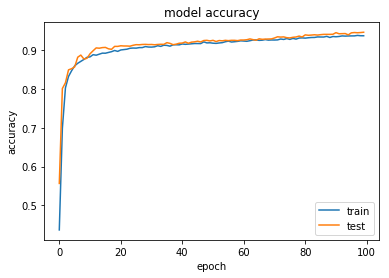

In [42]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

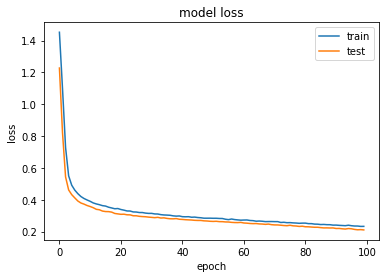

In [43]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [44]:
# Model evaluation with test data set 
# Prediction at test data set
Y_pred = model.predict(X_test)
score = model.evaluate(X_test, Y_test,batch_size=100, verbose=1)
print(score)
print("Baseline Error: %.2f%%" % (100-score[1]*100))

4789/4789 [==============================] - 0s 29us/step
[0.21861443982091472, 0.9415326788570318]
Baseline Error: 5.85%


In [45]:
# Class prediction
test_class = model.predict_classes(X_test)

In [46]:
## Confusion matrix
print("Confussion matrix:\n%s" %
      metrics.confusion_matrix(Y_test, test_class))

Confussion matrix:
[[ 982  111    9    0    0]
 [  45  820   14    0    0]
 [  47    8 1549   14    0]
 [   0    0   26  945    0]
 [   0    0    6    0  213]]


In [47]:
# Precission and accuracy:
print("Classification report:\n%s" %
      metrics.classification_report(Y_test, test_class))
print("Classification accuracy: %f" %
      metrics.accuracy_score(Y_test, test_class))

Classification report:
             precision    recall  f1-score   support

          0       0.91      0.89      0.90      1102
          1       0.87      0.93      0.90       879
          2       0.97      0.96      0.96      1618
          3       0.99      0.97      0.98       971
          4       1.00      0.97      0.99       219

avg / total       0.94      0.94      0.94      4789

Classification accuracy: 0.941533


####  Prediction at Grid Locations

In [48]:
# Import grid point data
grid = 'grid_data.csv'
grid_point = pd.read_csv(grid)
# Create grid data frame with ten bands
X_grid = grid_point[['B2','B3','B4','B5','B6','B7','B8','B8A','B11','B12']]
# Create xy-coordinated data frame
xy_grid=grid_point[['ID','x', 'y']]

In [49]:
# Scale the grid set
X_grid = preprocessing.scale(X_grid)

In [50]:
# Predictionv at grid locations
grid_class = pd.DataFrame(model.predict_classes(X_grid))

In [51]:
# Join xy-coordinates with predicted grid_class data frame
grid_class_xy = pd.concat([xy_grid, grid_class], axis=1, join_axes=[xy_grid.index])

In [52]:
# Rename predicted class column to Class_ID
grid_class_xy.columns.values[3] = 'Class_ID'

In [53]:
## Load landuse ID file
id = 'Landuse_ID_keras.csv'
LU_ID = pd.read_csv(id)
print(LU_ID)

   Class_ID    Class            Description
0         0  Class_1  Parking/road/pavement
1         1  Class_2               Building
2         2  Class_3            Tree/bushes
3         3  Class_4                  Grass
4         4  Class_5                  Water


In [54]:
# Join  Landuse class 
grid_class_final=pd.merge(grid_class_xy, LU_ID, left_on='Class_ID', right_on='Class_ID', how='left')

In [55]:
## Write CSV files 
grid_class_final.to_csv('predcted_landuse_class.csv', index=False)

In [56]:
### Create a spatial data frame
from osgeo import ogr, gdal
import geopandas as gpd
from shapely.geometry import Point
from pyproj import Proj, transform

# Define geometry
geometry = [Point(xy) for xy in zip(grid_class_final.x, grid_class_final.y)]
# Define projection (UTM zone 17N)
crs = {'init': 'epsg:26917'}
## Create Geodata frame
gdf = gpd.GeoDataFrame(grid_class_final, crs=crs, geometry = geometry)

# Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")
# Save as ESRI shape file
gdf.to_file("predicted_landuse.shp")

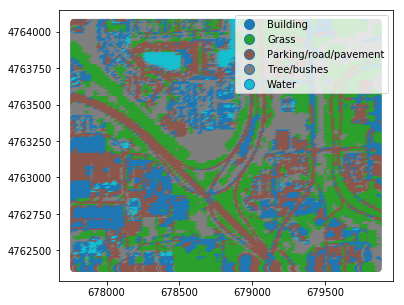

In [57]:
gdf.plot(column='Description',  legend=True,figsize=(6, 6))